In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K=3
num=600
weight=[0.2,0.3,0.5]
mean=[-10,0,5]
covs=[2,1,1]#标准差
Theta=np.array([weight,mean,covs])

In [3]:
a=int(weight[0]*num)
b=int((weight[0]+weight[1])*num)

In [4]:
np.random.seed(123)
bb=np.zeros(num)

In [5]:
for i in range(a):
    bb[i]=np.random.normal(mean[0],covs[0])
for i in range(a,b):
    bb[i]=np.random.normal(mean[1],covs[1])
for i in range(b,num):
    bb[i]=np.random.normal(mean[2],covs[2])

(array([ 4.,  9., 24., 37., 60., 68., 44., 32., 19.,  3.]),
 array([2.21188712, 2.74668343, 3.28147974, 3.81627605, 4.35107236,
        4.88586867, 5.42066499, 5.9554613 , 6.49025761, 7.02505392,
        7.55985023]),
 <BarContainer object of 10 artists>)

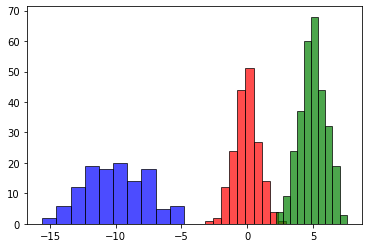

In [6]:
plt.hist(bb[0:a], bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(bb[a:b], bins=10,  facecolor="red", edgecolor="black", alpha=0.7)
plt.hist(bb[b:num], bins=10, facecolor="green", edgecolor="black", alpha=0.7)

In [7]:
def normal(x,theta):
    mu=theta[0]
    s=theta[1]#标准差
    result=(1/(np.sqrt(2*np.pi)*s))*np.exp(-1*(x-mu)*(x-mu)/(2*s**2))
    return result

In [8]:
'''
def normal(x,theta):
    mu=theta[0]
    s=theta[1]#标准差
    result=(1/np.sqrt(2*np.pi)*s)*np.exp((-1/(2*s**2))*pow(x-mu,2))
    return result
'''

'\ndef normal(x,theta):\n    mu=theta[0]\n    s=theta[1]#标准差\n    result=(1/np.sqrt(2*np.pi)*s)*np.exp((-1/(2*s**2))*pow(x-mu,2))\n    return result\n'

In [ ]:
def EM(X,theta):
    num=X.shape[0]
    C=theta.shape[1]
    Ga=np.zeros((num,C))
    c=np.zeros(C)
    d=np.zeros(C)
    thetanext=np.zeros((3,C))
    
    for j in range(num):#响应度
        for k in range(C):
            c[k]=theta[0][k]*normal(X[j],theta[1:,k])
        Ga[j]=c/np.sum(c)

    for k in range(C):#更新参数
        d[k]=np.sum(Ga[:,k])
        thetanext[0,k]=d[k]/num
        thetanext[1,k]=np.dot(Ga[:,k],X[:])/d[k]
        thetanext[2,k]=np.sqrt(np.dot(Ga[:,k],(X[:]-thetanext[1,k])**2)/d[k])#标准差

    return thetanext

In [10]:
weight0=[0.3,0.4,0.3]
mean0=[-5,0,5]
covs0=[1,1,1]
theta0=np.array([weight0,mean0,covs0])

In [11]:
def iterate(X,n,T0):
    for i in range (n):
        T0=EM(X,T0)
        
    return T0

In [12]:
Theta

array([[  0.2,   0.3,   0.5],
       [-10. ,   0. ,   5. ],
       [  2. ,   1. ,   1. ]])

In [13]:
iterate(bb,40,theta0)

array([[ 0.20139967,  0.29848105,  0.50011928],
       [-9.91952415, -0.04756776,  5.00090401],
       [ 2.36385727,  0.90757396,  0.97711144]])